In [66]:
library(tidyverse)

library(patchwork)
library(ggplot2)

source("../../utils/plots_eda.R")

# Results processing

In [ ]:
# Define the path and list all zip files
path_to_fed <- "after/kmeans_res/before"
zip_files <- list.files(path = path_to_fed, pattern = "\\.zip$", full.names = TRUE)

# Required file paths inside the zip archives
required_files <- c("kmeans/K_2/clustering.csv", "kmeans/K_5/clustering.csv",
                    "design.tsv")

for(i in seq_along(zip_files)) {
  zipfile <- zip_files[i]
  zip_contents <- unzip(zipfile, list = TRUE)$Name
  
  # Process each required file within the zip archive
  for (req in required_files) {
    if (!req %in% zip_contents) {
      warning(sprintf("File '%s' not found in zip: %s", req, zipfile))
      next
    }
    
    # Extract the specific file to the destination folder
    unzip(zipfile, files = req, exdir = path_to_fed)
    
    # Determine the destination filename based on the required file
    # Extract the specific part ("2" or "5") from the path using a simple regex:
    match <- regexpr("K_([0-9]+)", req)
    extracted_num <- if(match[1] != -1) substring(req, match[1] + 2, match[1] + attr(match, "match.length") - 1) else "unknown"
    new_csv_name <- file.path(path_to_fed, sprintf("%d_%s_clustering.csv", i, extracted_num))
    
    # Determine the path to the extracted file (it might be in a subdirectory)
    extracted_csv_path <- file.path(path_to_fed, req)
    if (!file.exists(extracted_csv_path)) {
      # Search recursively if not found in the expected location
      extracted_files <- list.files(path_to_fed, pattern = "\\.csv$", full.names = TRUE, recursive = TRUE)
      candidate <- extracted_files[basename(extracted_files) == basename(req)]
      if(length(candidate) > 0) {
        extracted_csv_path <- candidate[1]
      } else {
        warning(sprintf("Extracted CSV file not found for '%s' in zip: %s", req, zipfile))
        next
      }
    }
    
    # Rename (or move) the extracted file to the new filename
    if(!file.rename(from = extracted_csv_path, to = new_csv_name)) {
      warning(sprintf("Failed to rename file: %s to %s", extracted_csv_path, new_csv_name))
    }
  }
}


In [1]:
# Define the path and list all zip files
path_to_fed <- "after/kmeans_res/after"
zip_files <- list.files(path = path_to_fed, pattern = "\\.zip$", full.names = TRUE)

# Required file paths inside the zip archives
required_files <- c("kmeans/K_2/clustering.csv", "kmeans/K_5/clustering.csv",
                    "design.tsv")

for(i in seq_along(zip_files)) {
  zipfile <- zip_files[i]
  zip_contents <- unzip(zipfile, list = TRUE)$Name
  
  # Process each required file within the zip archive
  for (req in required_files) {
    if (!req %in% zip_contents) {
      warning(sprintf("File '%s' not found in zip: %s", req, zipfile))
      next
    }
    
    # Extract the specific file to the destination folder
    unzip(zipfile, files = req, exdir = path_to_fed)
    
    # Determine the destination filename based on the required file
    # Extract the specific part ("2" or "5") from the path using a simple regex:
    match <- regexpr("K_([0-9]+)", req)
    extracted_num <- if(match[1] != -1) substring(req, match[1] + 2, match[1] + attr(match, "match.length") - 1) else "unknown"
    new_csv_name <- file.path(path_to_fed, sprintf("%d_%s_clustering.csv", i, extracted_num))
    
    # Determine the path to the extracted file (it might be in a subdirectory)
    extracted_csv_path <- file.path(path_to_fed, req)
    if (!file.exists(extracted_csv_path)) {
      # Search recursively if not found in the expected location
      extracted_files <- list.files(path_to_fed, pattern = "\\.csv$", full.names = TRUE, recursive = TRUE)
      candidate <- extracted_files[basename(extracted_files) == basename(req)]
      if(length(candidate) > 0) {
        extracted_csv_path <- candidate[1]
      } else {
        warning(sprintf("Extracted CSV file not found for '%s' in zip: %s", req, zipfile))
        next
      }
    }
    
    # Rename (or move) the extracted file to the new filename
    if(!file.rename(from = extracted_csv_path, to = new_csv_name)) {
      warning(sprintf("Failed to rename file: %s to %s", extracted_csv_path, new_csv_name))
    }
  }
}


# Read clustering results

In [11]:
design_all <- NULL
paths_to_fed <- c("after/kmeans_res/before", "after/kmeans_res/after")

for(path_to_fed in paths_to_fed){
    design_result <- NULL
    for(i in 1:5){
        design <- read_delim(
            paste0(path_to_fed, "/", i, "_unknown_clustering.csv"), 
            col_names = TRUE,
            delim = "\t",
            # supress warnings
            show_col_types = FALSE
        )
        # Read the clustering results
        clustering_results <- read_delim(
            paste0(path_to_fed, "/", i, "_2_clustering.csv"), 
            col_names = TRUE,
            delim = ";",
            # supress warnings
            show_col_types = FALSE
        )
        # if before in the name, add _before
        if (grepl("before", path_to_fed)) {
            design$K2_before <- clustering_results$`0`
        } else {
            design$K2_after <- clustering_results$`0`
        }
        
        # Read the clustering results
        clustering_results <- read_delim(
            paste0(path_to_fed, "/", i, "_5_clustering.csv"), 
            col_names = TRUE,
            delim = ";",
            # supress warnings
            show_col_types = FALSE
        )
        if (grepl("before", path_to_fed)) {
            design$K5_before <- clustering_results$`0`
        } else {
            design$K5_after <- clustering_results$`0`
        }

        if (is.null(design_result)) {
            design_result <- design
        } else {
            design_result <- rbind(design_result, design)
        }
    }
    if (is.null(design_all)) {
        design_all <- design_result
    } else {
        # join the two dataframes using sample_id	Status	batch columns
        design_all <- full_join(design_all, design_result, by = c("sample_id", "Status", "batch"))
    }
}



New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [14]:
# write design_all to file
write_delim(
    design_all,
    "after/design_all.tsv",
    delim = "\t",
    col_names = TRUE
)

In [113]:
design_all <- read_delim(
    "after/design_all.tsv",
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
)

In [114]:
design_all <- design_all %>%
    mutate(
        # all columns to factor
        sample_id = as.factor(sample_id),
        # 0 is Glu, 1 is Pyr
        Status = factor(Status, levels = c(0, 1), labels = c("Glu", "Pyr")),
        batch = as.factor(batch),
        K2_before = factor(K2_before),
        K5_before = as.factor(K5_before),
        K2_after = as.factor(K2_after),
        K5_after = as.factor(K5_after)
    )


# plots based on the results

In [115]:
expr_before <- read_delim(
    "before/all_expr_for_correction.tsv", 
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
) %>%  column_to_rownames("sample_id")
expr_before <- t(expr_before) %>% as.data.frame()
expr_before <- expr_before[,design_all$sample_id]
print(dim(expr_before))

[1] 2067   98


In [116]:
expr_after <- read_delim(
    "after/all_corrected_R_expr.tsv", 
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
) %>%  column_to_rownames("gene_id")
expr_after <- expr_after[,design_all$sample_id]
print(dim(expr_after))

[1] 2067   98


In [117]:
options(repr.plot.width=5, repr.plot.height=4)

plot_before1 <- pca_plot(
    df = expr_before,
    batch_info = design_all,
    title = "Before correction, batch and status",
    quantitative_col_name = "sample_id",
    col_col = "Status",
    shape_col = "batch"
)

pca_before2 <- pca_plot(
    df = expr_before,
    batch_info = design_all,
    title = "Before correction, 2 and 5 clusters (kmeans)",
    quantitative_col_name = "sample_id",
    col_col = "K2_before",
    shape_col = "K5_before"
)

In [118]:
options(repr.plot.width=5, repr.plot.height=4)

plot_after1 <- pca_plot(
    df = expr_after,
    batch_info = design_all,
    title = "After correction, batch and status",
    quantitative_col_name = "sample_id",
    col_col = "Status",
    shape_col = "batch"
)


plot_after2 <- pca_plot(
    df = expr_after,
    batch_info = design_all,
    title = "After correction, 2 and 5 clusters (kmeans)",
    quantitative_col_name = "sample_id",
    col_col = "K2_after",
    shape_col = "K5_after",
    show_legend = TRUE,
    cbPalette = NULL
)

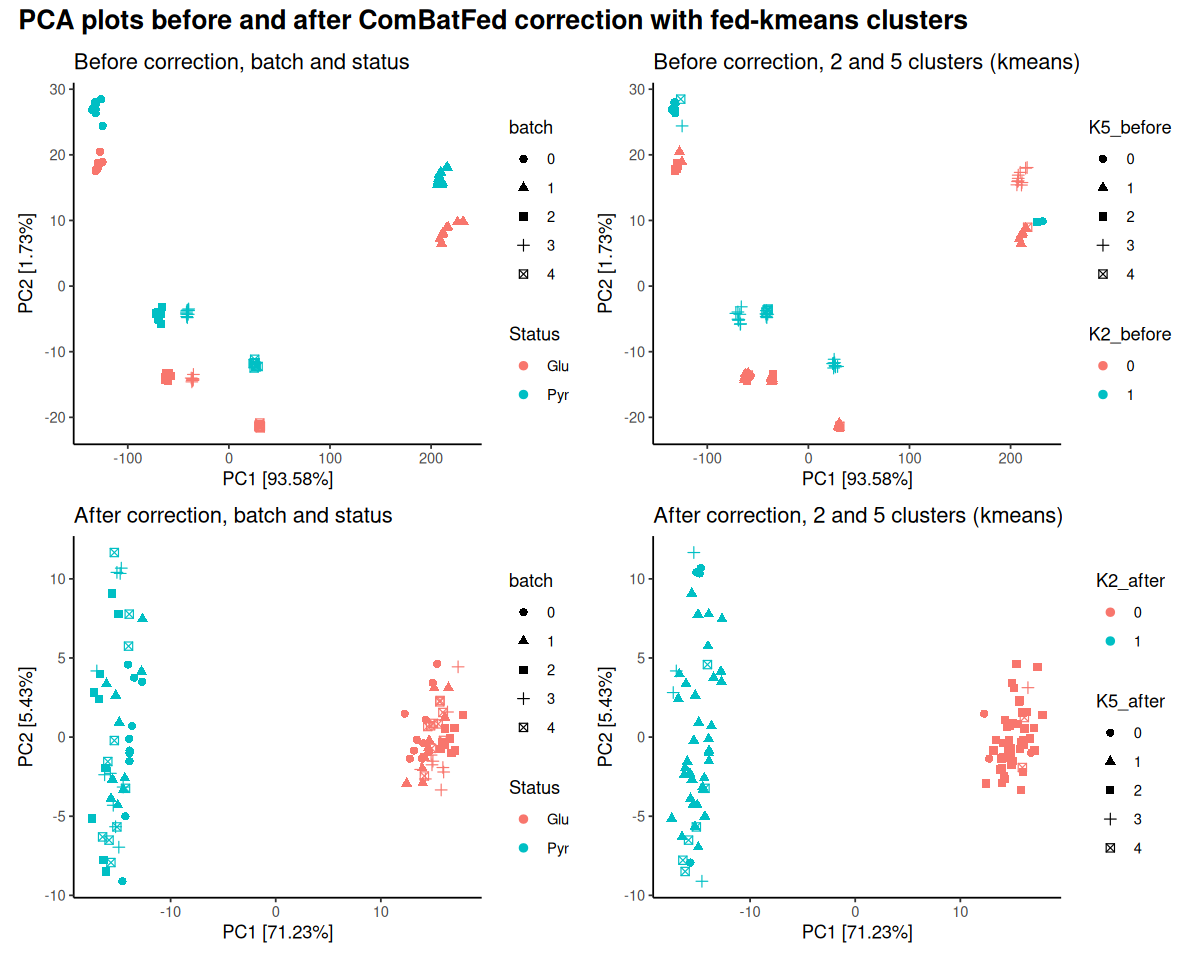

In [119]:
options(repr.plot.width=10, repr.plot.height=8)

combined_patchwork <- (plot_before1 | pca_before2)/
                      (plot_after1 | plot_after2)  +
                      plot_annotation(title = "PCA plots before and after ComBatFed correction with fed-kmeans clusters",
                                      theme = theme(plot.title = element_text(size = 16, face = "bold")))

# Display the combined plot
print(combined_patchwork)

# Scores

In [123]:
design_all <- read_delim(
    "after/design_all.tsv",
    col_names = TRUE,
    delim = "\t",
    # supress warnings
    show_col_types = FALSE
)

In [124]:
# If Status is correct labels, culculate F1 scores for K2_before and K2_after
f1_score <- function(df, col1, col2) {
    # Create a confusion matrix
    cm <- table(df[[col1]], df[[col2]])
    
    # Calculate precision and recall
    precision <- diag(cm) / rowSums(cm)
    recall <- diag(cm) / colSums(cm)
    print(precision)
    print(recall)

    # Calculate F1 score
    f1_score <- 2 * (precision * recall) / (precision + recall)
    
    print(f1_score)
    print("______")
    # Return the F1 score
    return(f1_score)
}
# Calculate F1 scores for K2_before and K2_after
f1_scores_before <- f1_score(design_all, "K2_before", "Status")
f1_scores_after <- f1_score(design_all, "K2_after", "Status")

# # Print the F1 scores
# print(f1_scores_before)
# print(f1_scores_after)

        0         1 
0.8245614 0.9512195 
        0         1 
0.9591837 0.7959184 
        0         1 
0.8867925 0.8666667 
[1] "______"
0 1 
1 1 
0 1 
1 1 
0 1 
1 1 
[1] "______"


In [126]:
f1_score_single <- function(df, pred_col, true_col, positive = 1) {
  # Create confusion matrix
  cm <- table(Predicted = df[[pred_col]], Actual = df[[true_col]])
  
  # Ensure the positive class exists in the confusion matrix
  if(!(positive %in% rownames(cm)) || !(positive %in% colnames(cm))) {
    stop("The specified positive class is not present in the predictions or actual labels.")
  }
  
  # Extract True Positives, False Positives, and False Negatives
  TP <- cm[as.character(positive), as.character(positive)]
  FP <- sum(cm[as.character(positive), ]) - TP
  FN <- sum(cm[, as.character(positive)]) - TP
  
  # Calculate F1 score
  f1 <- 2 * TP / (2 * TP + FP + FN)
  precision <- TP / (TP + FP)
  recall <- TP / (TP + FN)
  return(c(f1, precision, recall))
}

# Example usage for K2_before
f1_before <- f1_score_single(design_all, "K2_before", "Status", positive = 1)
print(f1_before)

# Example usage for K2_after
f1_after <- f1_score_single(design_all, "K2_after", "Status", positive = 1)
print(f1_after)


[1] 0.8666667 0.9512195 0.7959184


[1] 1 1 1
